In [1]:
import os
os.chdir("/Users/xinhaoliu/Desktop/Research/Code/paste")

import scanpy as sc
import matplotlib.pyplot as plt

from src.paste.fractional_align import partial_pairwise_align_given_cost_matrix
from src.paste.helper import intersect, to_dense_array, extract_data_matrix, glmpca_distance
from spatial_coherence import calculate_spatial_coherence_for_alignment
from convex_hull import convex_hull_area

%load_ext autoreload
%autoreload 2

In [2]:
def plot_area_curve(m_list, source_area_list, target_area_list):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(m_list, source_area_list)
    ax1.set_xlim(1, 0)
    ax1.set_xticks([0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
    ax1.set_xlabel('m')
    ax1.set_ylabel('Area')
    ax1.set_title('Source slice')
    
    fig, ax2 = plt.subplots(figsize=(12, 8))
    ax2.plot(m_list, target_area_list)
    ax2.set_xlim(1, 0)
    ax2.set_xticks([0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
    ax2.set_xlabel('m')
    ax2.set_ylabel('Area')
    ax2.set_title('Target slice')
    
    plt.show()
    
    
def plot_entropy_curve(m_list, source_entropy_list, target_entropy_list):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(m_list, source_entropy_list)
    ax1.set_xlim(1, 0)
    ax1.set_xticks([0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
    ax1.set_xlabel('m')
    ax1.set_ylabel('Spatial Entropy')
    ax1.set_title('Source slice')
    
    fig, ax2 = plt.subplots(figsize=(12, 8))
    ax2.plot(m_list, target_entropy_list)
    ax2.set_xlim(1, 0)
    ax2.set_xticks([0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
    ax2.set_xlabel('m')
    ax2.set_ylabel('Spatial Entropy')
    ax2.set_title('Target slice')
    
    plt.show()

In [ ]:
***
151673_00 - 151674_10
m=0.5
***

In [4]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=8.0549E+6
Iteration: 1 | deviance=8.0546E+6
Iteration: 2 | deviance=7.0755E+6
Iteration: 3 | deviance=6.8258E+6
Iteration: 4 | deviance=6.7297E+6
Iteration: 5 | deviance=6.6853E+6
Iteration: 6 | deviance=6.6600E+6
Iteration: 7 | deviance=6.6435E+6
Iteration: 8 | deviance=6.6317E+6
Iteration: 9 | deviance=6.6228E+6
Iteration: 10 | deviance=6.6158E+6
Iteration: 11 | deviance=6.6101E+6
Iteration: 12 | deviance=6.6055E+6
Iteration: 13 | deviance=6.6015E+6
Iteration: 14 | deviance=6.5982E+6
Iteration: 15 | deviance=6.5953E+6
Iteration: 16 | deviance=6.5927E+6
Iteration: 17 | deviance=6.5904E+6
Iteration: 18 | deviance=6.5884E+6
Iteration: 19 | deviance=6.5866E+6
Iteration: 20 | deviance=6.5850E+6
Iteration: 21 | deviance=6.5836E+6
Iteration: 22 | deviance=6.5822E+6
Iteration: 23 | deviance=6.5810E+6
Iteration: 24 | deviance=6.5799E+6
Iteration: 25 | deviance=6.5788E+6
Iteration: 26 | deviance=6.5779E+6
Iteration: 27 | deviance=6.5770E+6
Iteration:

In [18]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

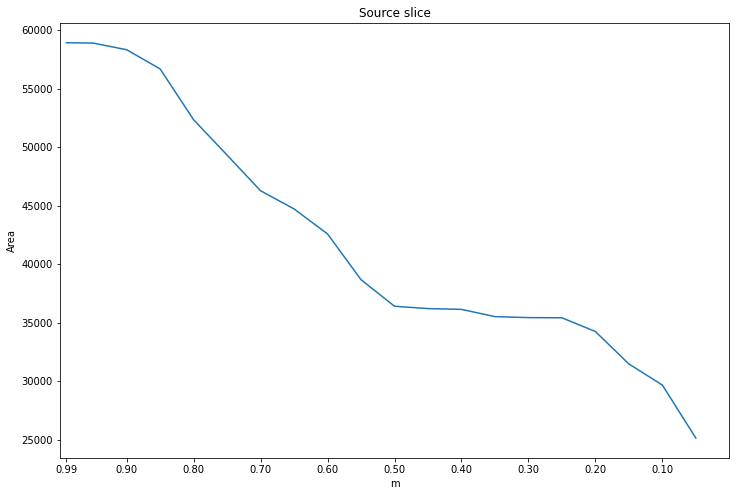

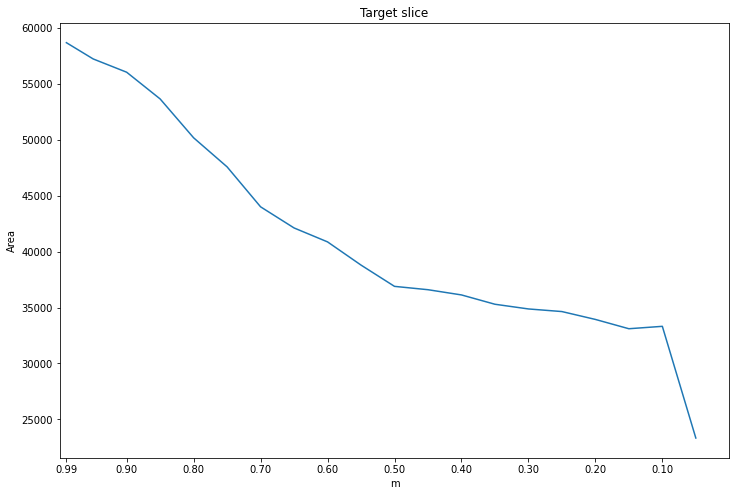

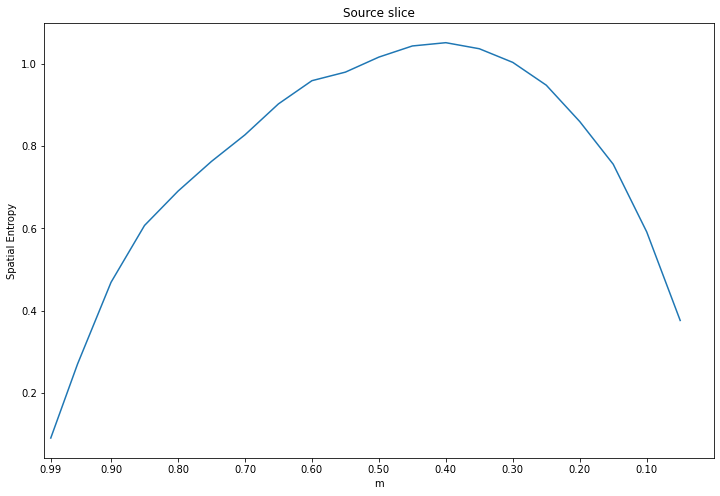

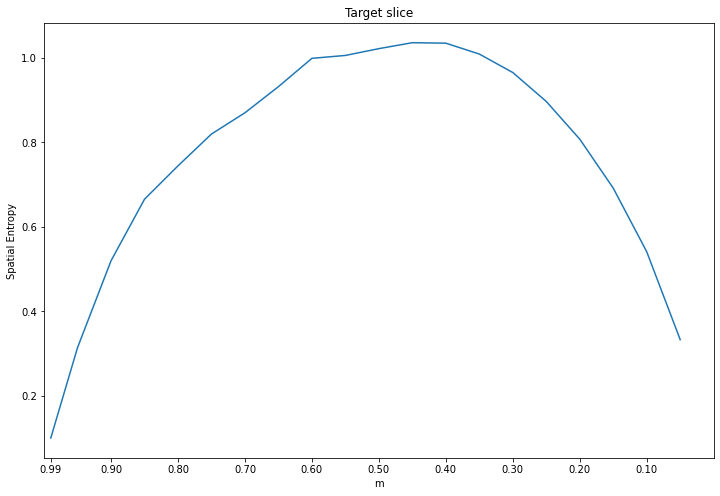

In [22]:
plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)

In [ ]:
***
151673_00 - 151674_10
m=0.7
***

In [24]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.7_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.7_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.1096E+7
Iteration: 1 | deviance=1.1095E+7
Iteration: 2 | deviance=9.6860E+6
Iteration: 3 | deviance=9.4182E+6
Iteration: 4 | deviance=9.2998E+6
Iteration: 5 | deviance=9.2414E+6
Iteration: 6 | deviance=9.2082E+6
Iteration: 7 | deviance=9.1869E+6
Iteration: 8 | deviance=9.1719E+6
Iteration: 9 | deviance=9.1606E+6
Iteration: 10 | deviance=9.1518E+6
Iteration: 11 | deviance=9.1447E+6
Iteration: 12 | deviance=9.1388E+6
Iteration: 13 | deviance=9.1339E+6
Iteration: 14 | deviance=9.1297E+6
Iteration: 15 | deviance=9.1261E+6
Iteration: 16 | deviance=9.1230E+6
Iteration: 17 | deviance=9.1202E+6
Iteration: 18 | deviance=9.1178E+6
Iteration: 19 | deviance=9.1156E+6
Iteration: 20 | deviance=9.1137E+6
Iteration: 21 | deviance=9.1120E+6
Iteration: 22 | deviance=9.1104E+6
Iteration: 23 | deviance=9.1089E+6
Iteration: 24 | deviance=9.1076E+6
Iteration: 25 | deviance=9.1064E+6
Iteration: 26 | deviance=9.1052E+6
Iteration: 27 | deviance=9.1042E+6
Iteration:

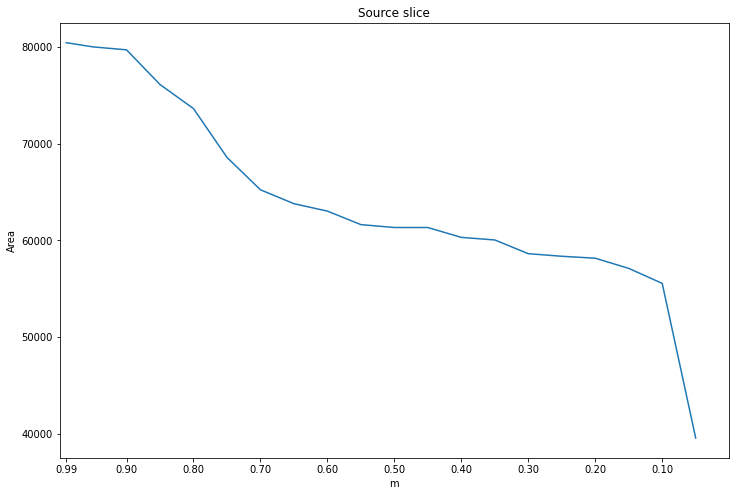

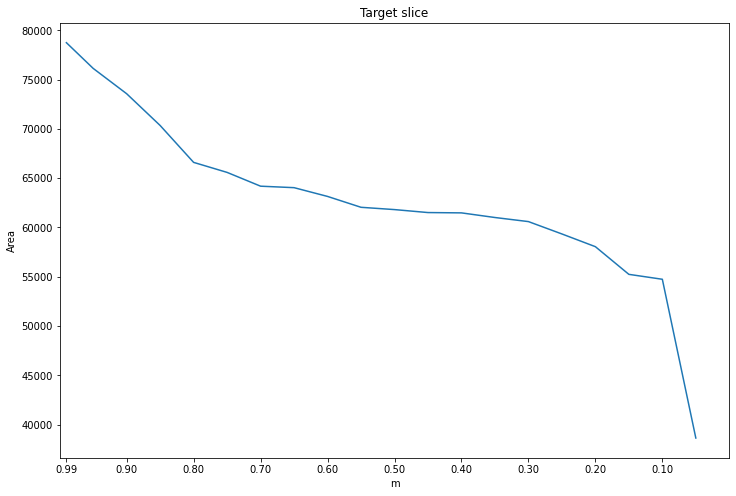

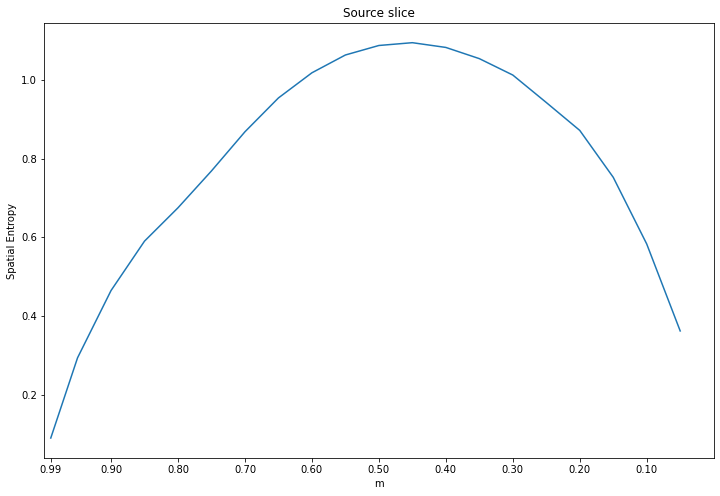

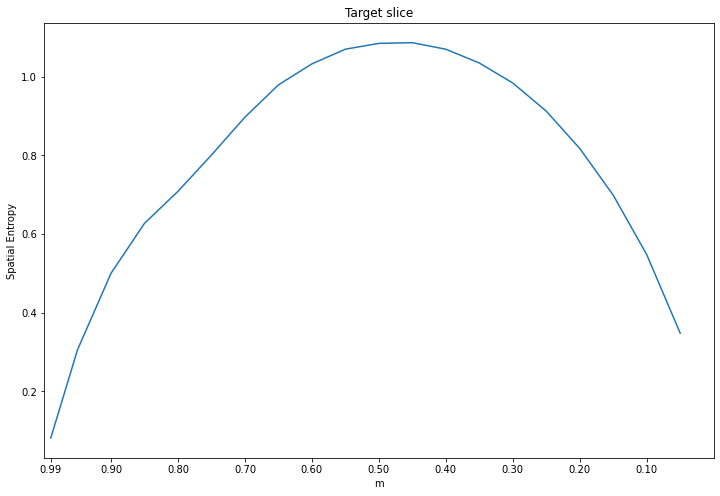

In [25]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)

In [ ]:
***
151673_00 - 151674_10
m=0.9
***

In [26]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.9_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.9_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.5920E+7
Iteration: 1 | deviance=1.5917E+7
Iteration: 2 | deviance=1.3890E+7
Iteration: 3 | deviance=1.3504E+7
Iteration: 4 | deviance=1.3345E+7
Iteration: 5 | deviance=1.3261E+7
Iteration: 6 | deviance=1.3212E+7
Iteration: 7 | deviance=1.3181E+7
Iteration: 8 | deviance=1.3161E+7
Iteration: 9 | deviance=1.3147E+7
Iteration: 10 | deviance=1.3136E+7
Iteration: 11 | deviance=1.3127E+7
Iteration: 12 | deviance=1.3120E+7
Iteration: 13 | deviance=1.3114E+7
Iteration: 14 | deviance=1.3109E+7
Iteration: 15 | deviance=1.3105E+7
Iteration: 16 | deviance=1.3101E+7
Iteration: 17 | deviance=1.3098E+7
Iteration: 18 | deviance=1.3095E+7
Iteration: 19 | deviance=1.3092E+7
Iteration: 20 | deviance=1.3090E+7
Iteration: 21 | deviance=1.3088E+7
Iteration: 22 | deviance=1.3086E+7
Iteration: 23 | deviance=1.3084E+7
Iteration: 24 | deviance=1.3083E+7
Iteration: 25 | deviance=1.3081E+7
GLM-PCA finished with joint matrix shape (6516, 50)


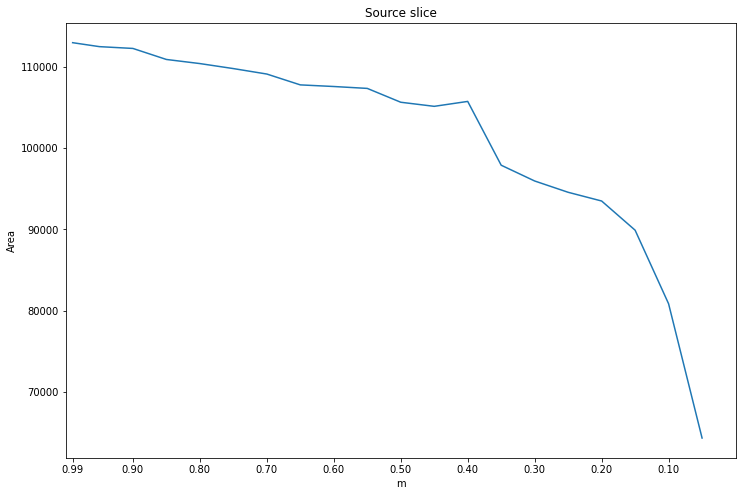

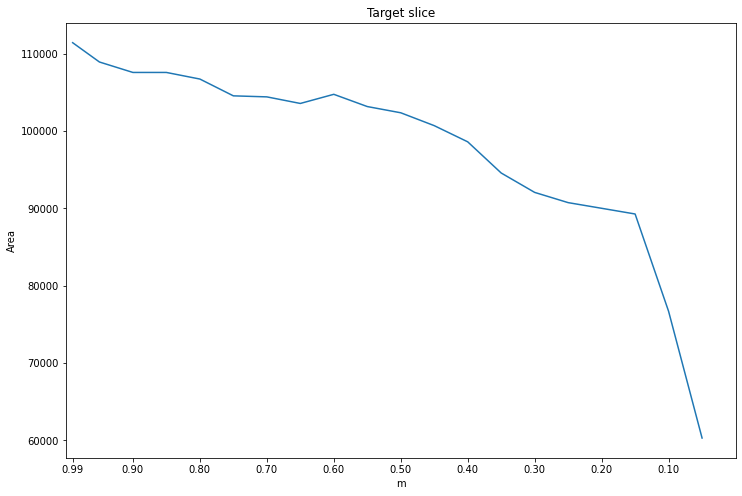

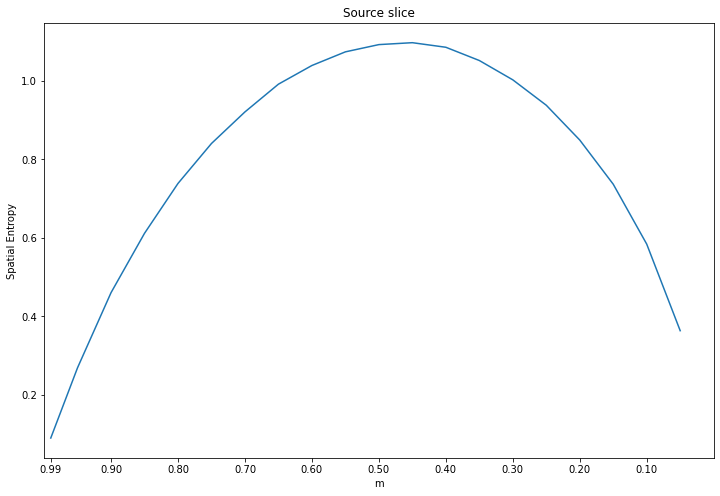

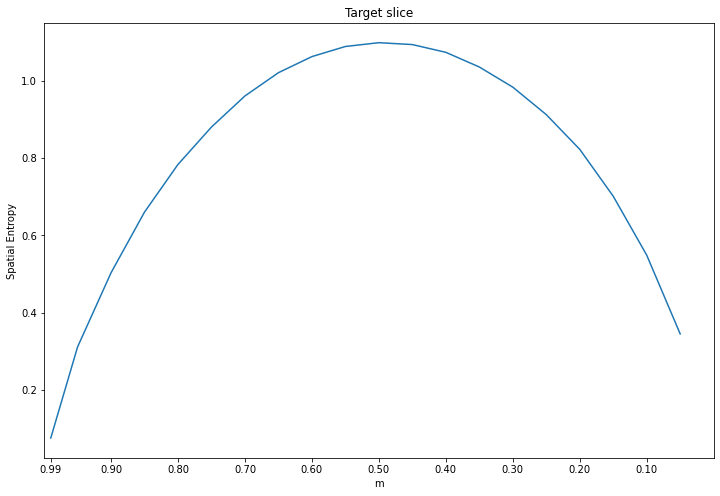

In [27]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)

In [ ]:
***
151673_00 - 151674_10
m=0.3
***

In [34]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.3_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.3_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=6.1313E+6
Iteration: 1 | deviance=6.1311E+6
Iteration: 2 | deviance=5.3439E+6
Iteration: 3 | deviance=5.1627E+6
Iteration: 4 | deviance=5.0823E+6
Iteration: 5 | deviance=5.0406E+6
Iteration: 6 | deviance=5.0165E+6
Iteration: 7 | deviance=5.0003E+6
Iteration: 8 | deviance=4.9884E+6
Iteration: 9 | deviance=4.9794E+6
Iteration: 10 | deviance=4.9722E+6
Iteration: 11 | deviance=4.9664E+6
Iteration: 12 | deviance=4.9616E+6
Iteration: 13 | deviance=4.9576E+6
Iteration: 14 | deviance=4.9541E+6
Iteration: 15 | deviance=4.9512E+6
Iteration: 16 | deviance=4.9487E+6
Iteration: 17 | deviance=4.9464E+6
Iteration: 18 | deviance=4.9444E+6
Iteration: 19 | deviance=4.9427E+6
Iteration: 20 | deviance=4.9411E+6
Iteration: 21 | deviance=4.9397E+6
Iteration: 22 | deviance=4.9383E+6
Iteration: 23 | deviance=4.9372E+6
Iteration: 24 | deviance=4.9361E+6
Iteration: 25 | deviance=4.9351E+6
Iteration: 26 | deviance=4.9341E+6
Iteration: 27 | deviance=4.9333E+6
Iteration:

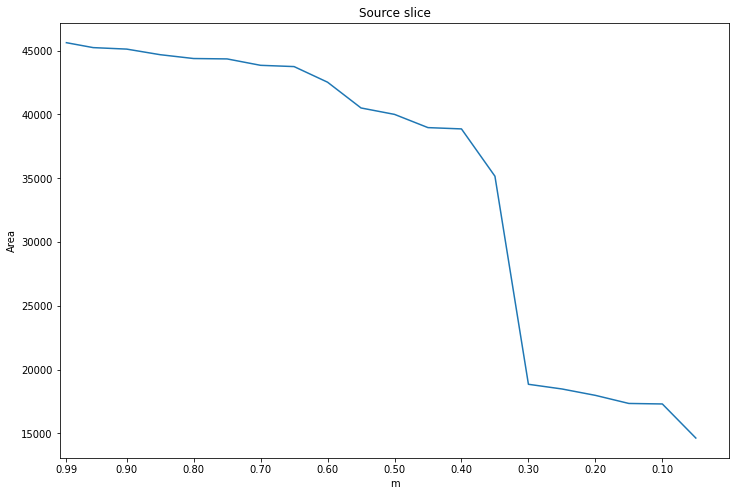

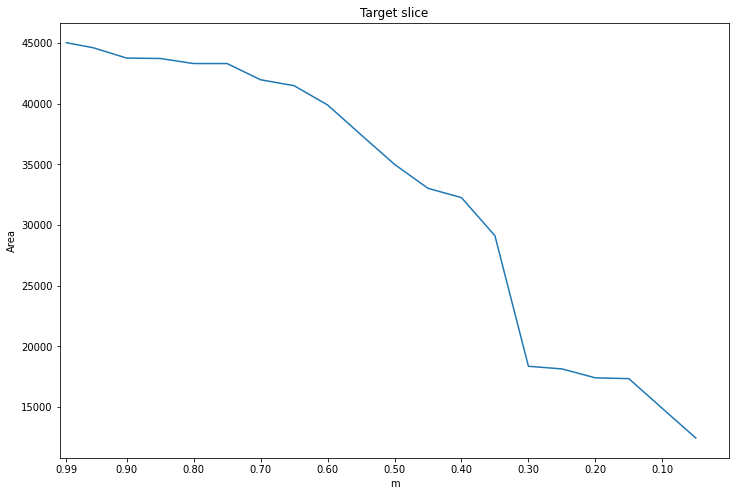

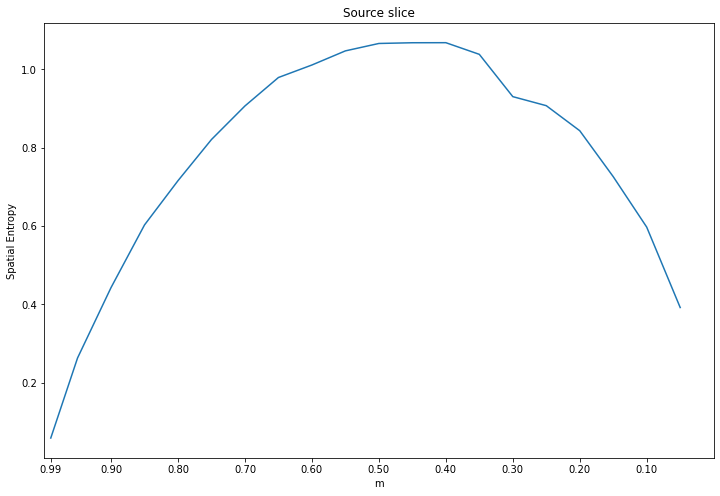

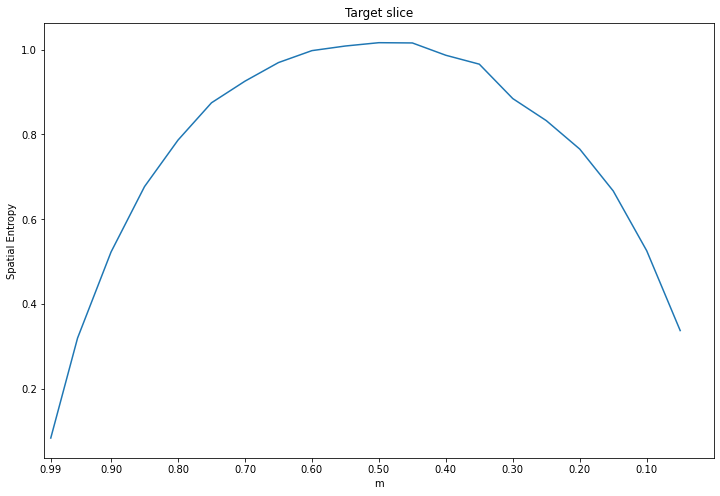

In [35]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)

In [ ]:
***
151673_00 - 151674_01
m=0.3
***

In [11]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.3_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.3_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col1.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=5.9347E+6
Iteration: 1 | deviance=5.9345E+6
Iteration: 2 | deviance=5.5849E+6
Iteration: 3 | deviance=5.3942E+6
Iteration: 4 | deviance=5.3028E+6
Iteration: 5 | deviance=5.2604E+6
Iteration: 6 | deviance=5.2373E+6
Iteration: 7 | deviance=5.2220E+6
Iteration: 8 | deviance=5.2109E+6
Iteration: 9 | deviance=5.2023E+6
Iteration: 10 | deviance=5.1954E+6
Iteration: 11 | deviance=5.1898E+6
Iteration: 12 | deviance=5.1851E+6
Iteration: 13 | deviance=5.1812E+6
Iteration: 14 | deviance=5.1779E+6
Iteration: 15 | deviance=5.1751E+6
Iteration: 16 | deviance=5.1726E+6
Iteration: 17 | deviance=5.1705E+6
Iteration: 18 | deviance=5.1687E+6
Iteration: 19 | deviance=5.1670E+6
Iteration: 20 | deviance=5.1656E+6
Iteration: 21 | deviance=5.1643E+6
Iteration: 22 | deviance=5.1631E+6
Iteration: 23 | deviance=5.1621E+6
Iteration: 24 | deviance=5.1611E+6
Iteration: 25 | deviance=5.1602E+6
Iteration: 26 | deviance=5.1594E+6
Iteration: 27 | deviance=5.1587E+6
Iteration:

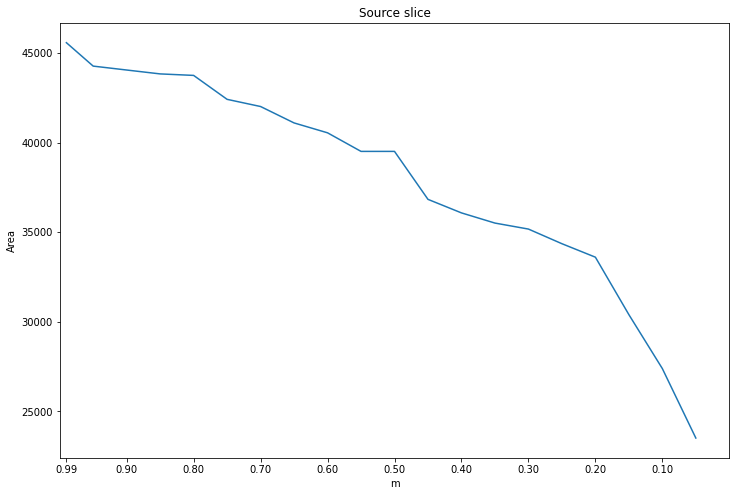

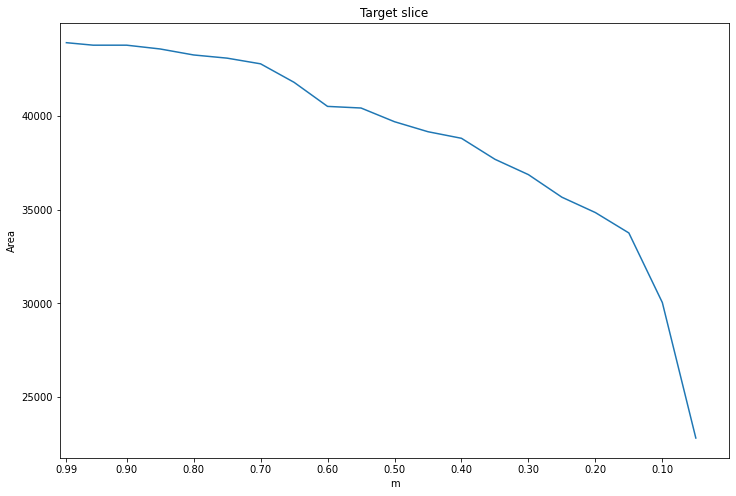

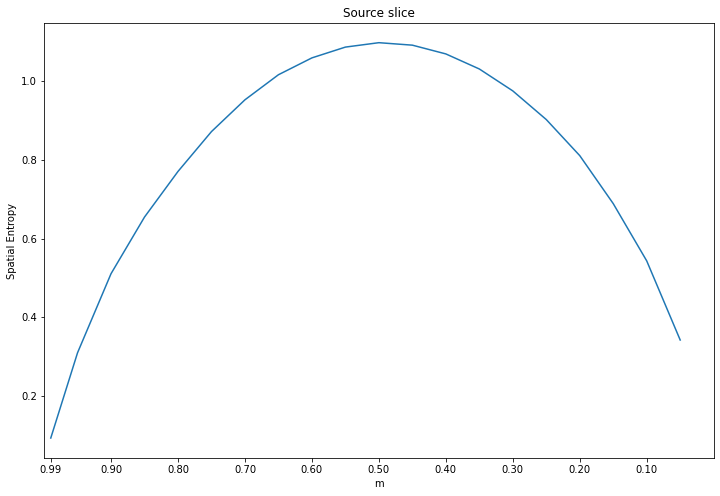

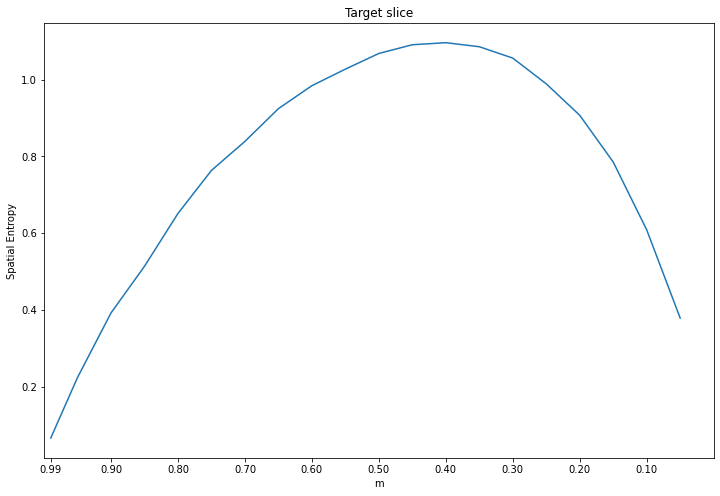

In [12]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)

In [ ]:
***
151673_00 - 151674_01
m=0.5
***

In [28]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col1.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=7.9526E+6
Iteration: 1 | deviance=7.9521E+6
Iteration: 2 | deviance=7.3846E+6
Iteration: 3 | deviance=7.1770E+6
Iteration: 4 | deviance=7.0755E+6
Iteration: 5 | deviance=7.0192E+6
Iteration: 6 | deviance=6.9860E+6
Iteration: 7 | deviance=6.9643E+6
Iteration: 8 | deviance=6.9489E+6
Iteration: 9 | deviance=6.9372E+6
Iteration: 10 | deviance=6.9279E+6
Iteration: 11 | deviance=6.9203E+6
Iteration: 12 | deviance=6.9140E+6
Iteration: 13 | deviance=6.9087E+6
Iteration: 14 | deviance=6.9043E+6
Iteration: 15 | deviance=6.9005E+6
Iteration: 16 | deviance=6.8972E+6
Iteration: 17 | deviance=6.8944E+6
Iteration: 18 | deviance=6.8920E+6
Iteration: 19 | deviance=6.8898E+6
Iteration: 20 | deviance=6.8880E+6
Iteration: 21 | deviance=6.8863E+6
Iteration: 22 | deviance=6.8848E+6
Iteration: 23 | deviance=6.8835E+6
Iteration: 24 | deviance=6.8823E+6
Iteration: 25 | deviance=6.8812E+6
Iteration: 26 | deviance=6.8802E+6
Iteration: 27 | deviance=6.8794E+6
Iteration:

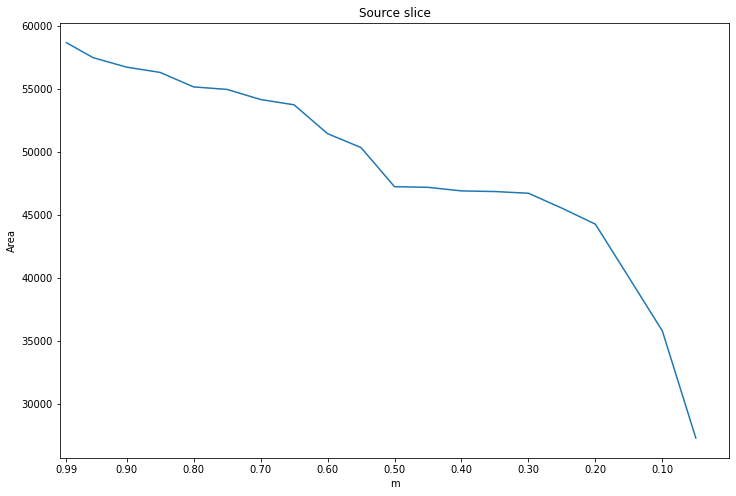

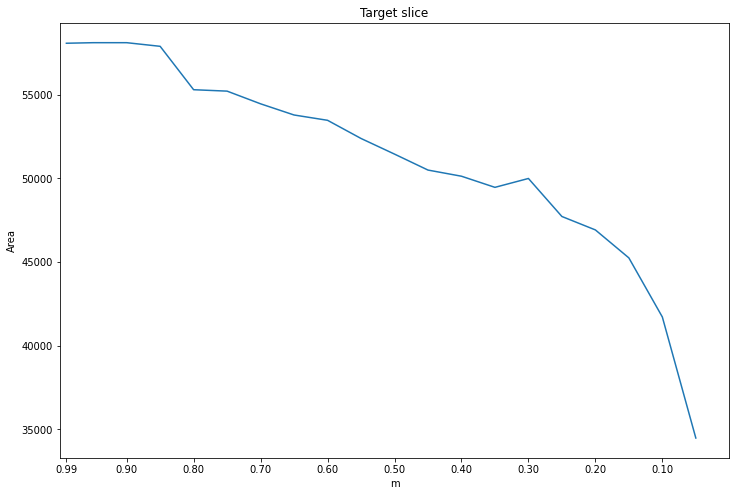

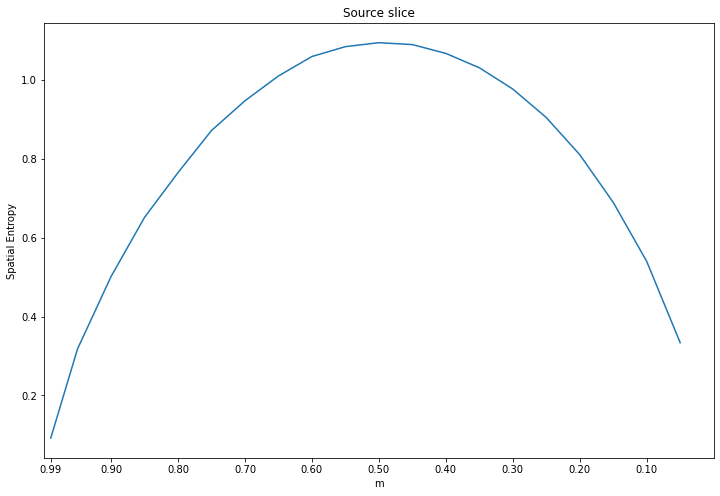

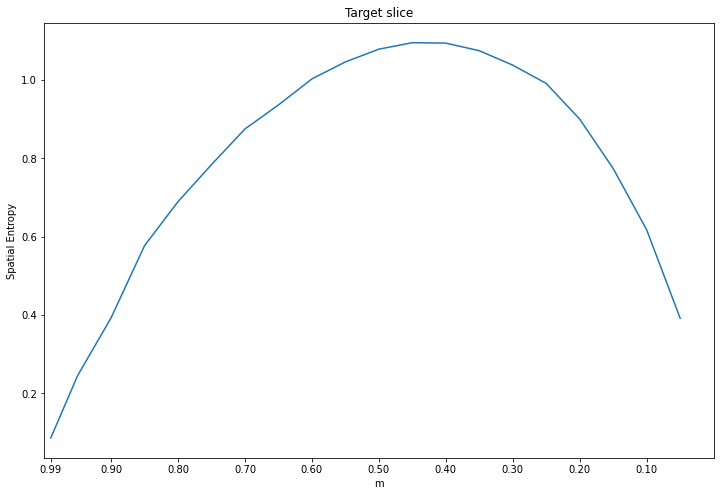

In [29]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)

In [ ]:
***
151673_00 - 151674_01
m=0.7
***

In [30]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.7_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.7_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col1.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.1158E+7
Iteration: 1 | deviance=1.1158E+7
Iteration: 2 | deviance=1.0079E+7
Iteration: 3 | deviance=9.7861E+6
Iteration: 4 | deviance=9.6681E+6
Iteration: 5 | deviance=9.6126E+6
Iteration: 6 | deviance=9.5818E+6
Iteration: 7 | deviance=9.5617E+6
Iteration: 8 | deviance=9.5473E+6
Iteration: 9 | deviance=9.5364E+6
Iteration: 10 | deviance=9.5279E+6
Iteration: 11 | deviance=9.5211E+6
Iteration: 12 | deviance=9.5155E+6
Iteration: 13 | deviance=9.5108E+6
Iteration: 14 | deviance=9.5068E+6
Iteration: 15 | deviance=9.5034E+6
Iteration: 16 | deviance=9.5004E+6
Iteration: 17 | deviance=9.4978E+6
Iteration: 18 | deviance=9.4955E+6
Iteration: 19 | deviance=9.4935E+6
Iteration: 20 | deviance=9.4917E+6
Iteration: 21 | deviance=9.4901E+6
Iteration: 22 | deviance=9.4886E+6
Iteration: 23 | deviance=9.4873E+6
Iteration: 24 | deviance=9.4861E+6
Iteration: 25 | deviance=9.4850E+6
Iteration: 26 | deviance=9.4840E+6
GLM-PCA finished with joint matrix shape (477

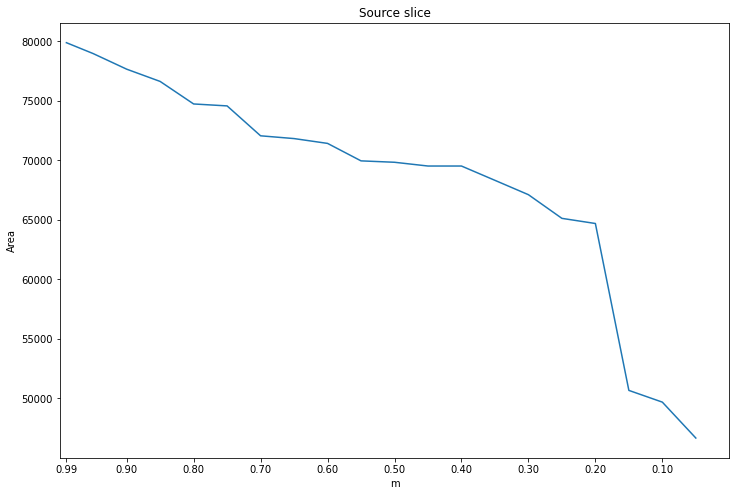

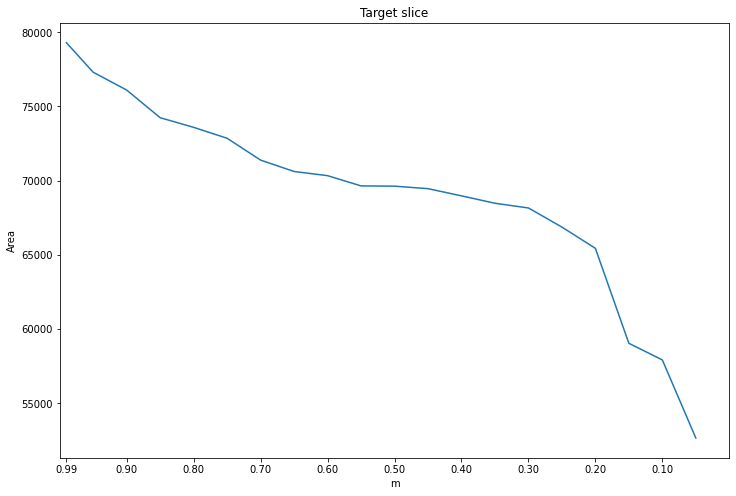

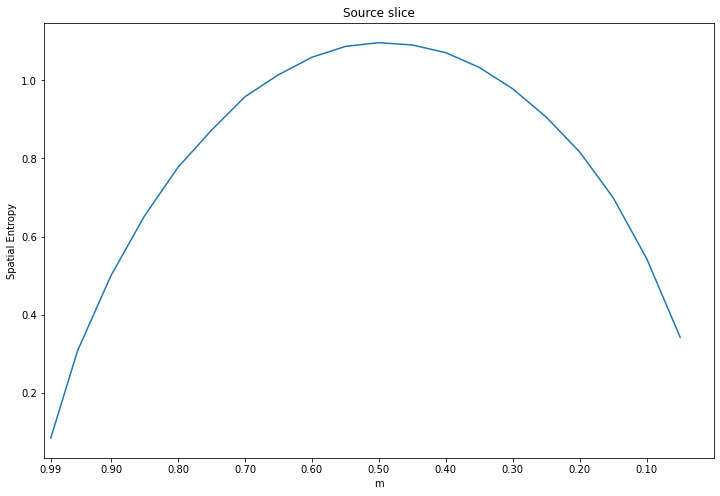

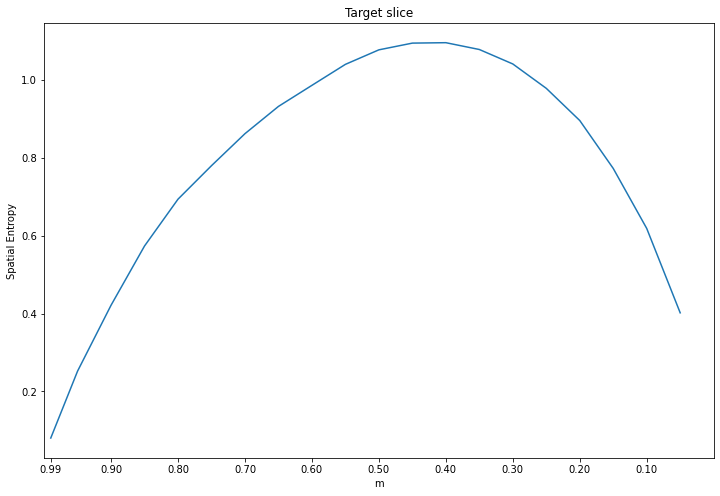

In [31]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)

In [ ]:
***
151673_00 - 151674_01
m=0.9
***

In [32]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.9_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.9_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col1.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.6159E+7
Iteration: 1 | deviance=1.6157E+7
Iteration: 2 | deviance=1.4213E+7
Iteration: 3 | deviance=1.3854E+7
Iteration: 4 | deviance=1.3692E+7
Iteration: 5 | deviance=1.3604E+7
Iteration: 6 | deviance=1.3555E+7
Iteration: 7 | deviance=1.3526E+7
Iteration: 8 | deviance=1.3506E+7
Iteration: 9 | deviance=1.3491E+7
Iteration: 10 | deviance=1.3479E+7
Iteration: 11 | deviance=1.3470E+7
Iteration: 12 | deviance=1.3463E+7
Iteration: 13 | deviance=1.3457E+7
Iteration: 14 | deviance=1.3452E+7
Iteration: 15 | deviance=1.3447E+7
Iteration: 16 | deviance=1.3444E+7
Iteration: 17 | deviance=1.3440E+7
Iteration: 18 | deviance=1.3437E+7
Iteration: 19 | deviance=1.3435E+7
Iteration: 20 | deviance=1.3432E+7
Iteration: 21 | deviance=1.3430E+7
Iteration: 22 | deviance=1.3428E+7
Iteration: 23 | deviance=1.3427E+7
Iteration: 24 | deviance=1.3425E+7
Iteration: 25 | deviance=1.3424E+7
GLM-PCA finished with joint matrix shape (6667, 50)


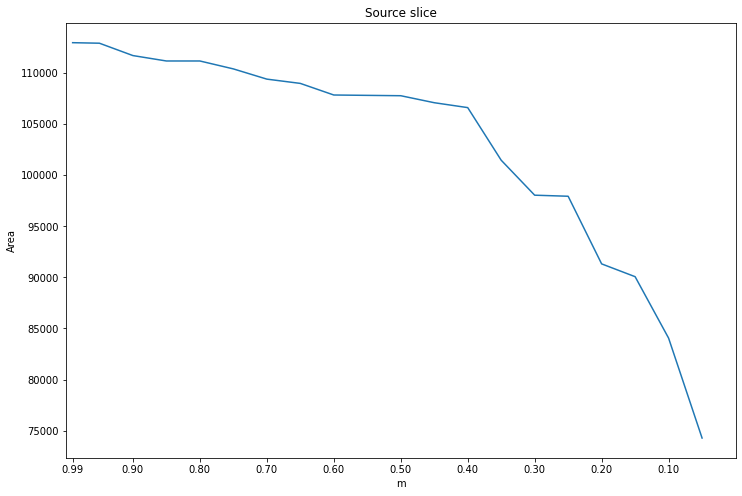

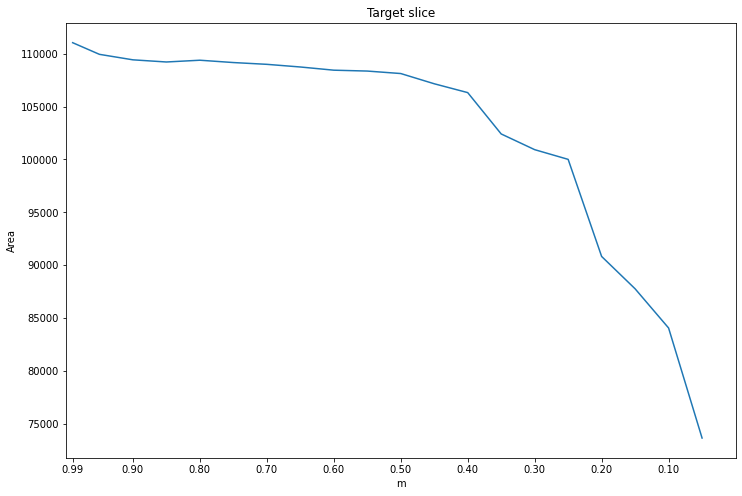

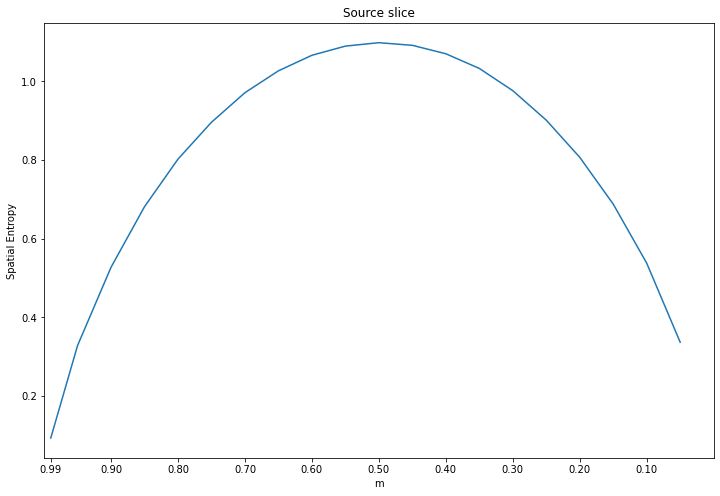

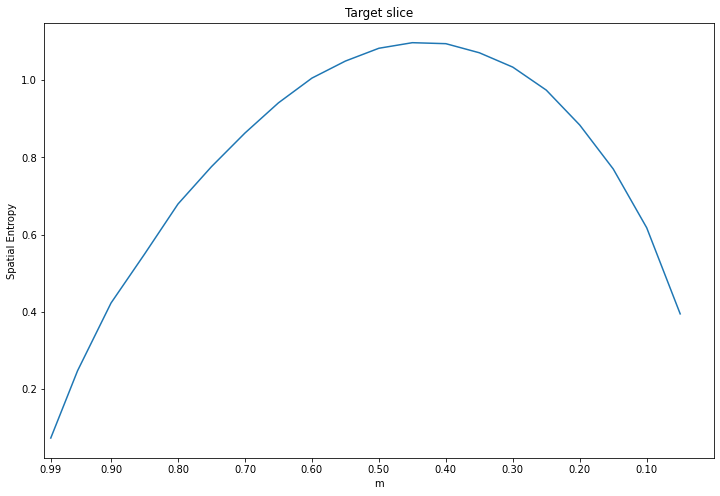

In [33]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)

In [ ]:
***
sim00-10
m=0.3
delta=0.1
***

In [3]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.3_dropFalse_rotateFalse_resampleTrue_delta0.1_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.3_dropFalse_rotateFalse_resampleTrue_delta0.1_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=7.3866E+6
Iteration: 1 | deviance=7.3864E+6
Iteration: 2 | deviance=6.6690E+6
Iteration: 3 | deviance=6.4211E+6
Iteration: 4 | deviance=6.3053E+6
Iteration: 5 | deviance=6.2453E+6
Iteration: 6 | deviance=6.2096E+6
Iteration: 7 | deviance=6.1858E+6
Iteration: 8 | deviance=6.1686E+6
Iteration: 9 | deviance=6.1557E+6
Iteration: 10 | deviance=6.1456E+6
Iteration: 11 | deviance=6.1374E+6
Iteration: 12 | deviance=6.1307E+6
Iteration: 13 | deviance=6.1250E+6
Iteration: 14 | deviance=6.1202E+6
Iteration: 15 | deviance=6.1160E+6
Iteration: 16 | deviance=6.1124E+6
Iteration: 17 | deviance=6.1093E+6
Iteration: 18 | deviance=6.1065E+6
Iteration: 19 | deviance=6.1041E+6
Iteration: 20 | deviance=6.1019E+6
Iteration: 21 | deviance=6.1000E+6
Iteration: 22 | deviance=6.0982E+6
Iteration: 23 | deviance=6.0967E+6
Iteration: 24 | deviance=6.0952E+6
Iteration: 25 | deviance=6.0939E+6
Iteration: 26 | deviance=6.0927E+6
Iteration: 27 | deviance=6.0916E+6
Iteration:

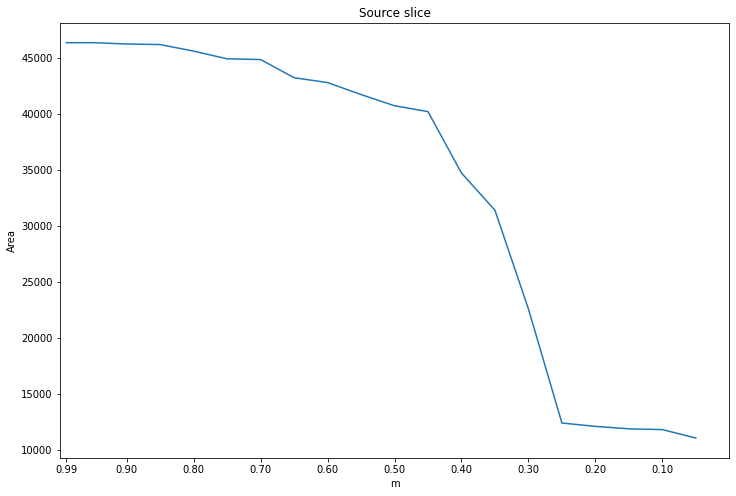

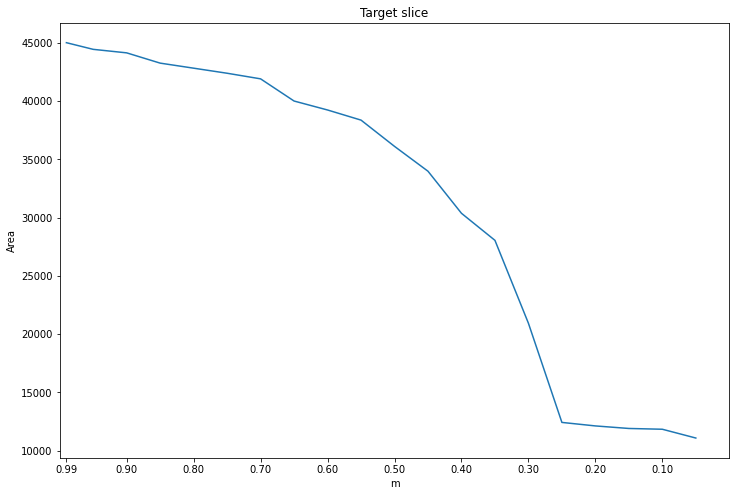

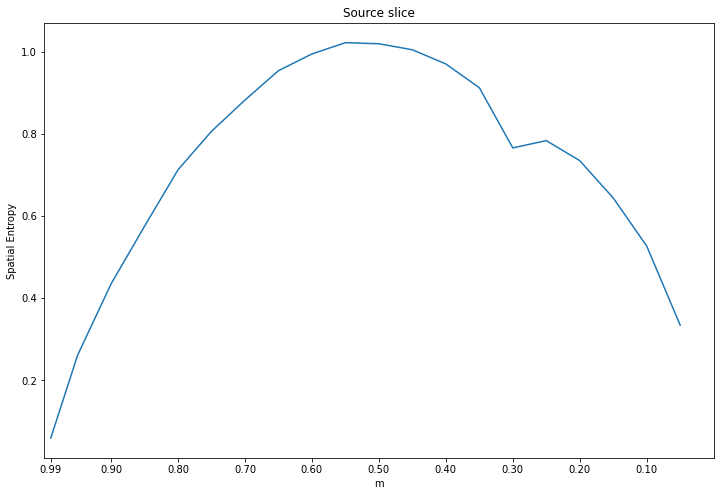

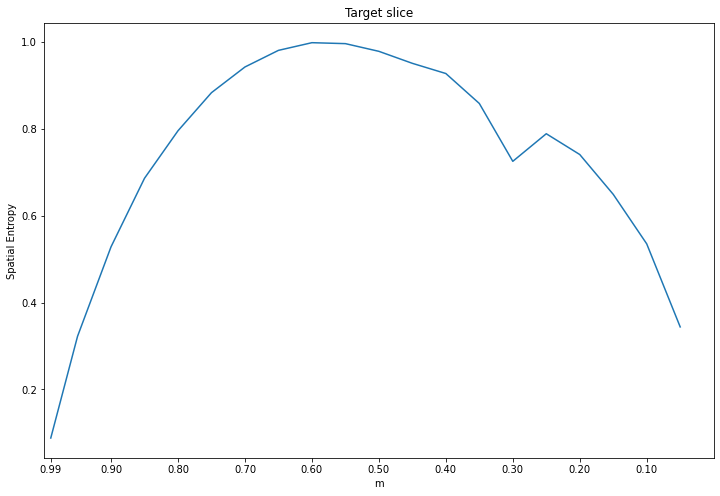

In [4]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)

In [ ]:
***
sim00-10
m=0.5
delta=0.1
***

In [5]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.5_dropFalse_rotateFalse_resampleTrue_delta0.1_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.5_dropFalse_rotateFalse_resampleTrue_delta0.1_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=9.6993E+6
Iteration: 1 | deviance=9.6991E+6
Iteration: 2 | deviance=8.7863E+6
Iteration: 3 | deviance=8.4746E+6
Iteration: 4 | deviance=8.3385E+6
Iteration: 5 | deviance=8.2733E+6
Iteration: 6 | deviance=8.2354E+6
Iteration: 7 | deviance=8.2104E+6
Iteration: 8 | deviance=8.1922E+6
Iteration: 9 | deviance=8.1784E+6
Iteration: 10 | deviance=8.1677E+6
Iteration: 11 | deviance=8.1591E+6
Iteration: 12 | deviance=8.1521E+6
Iteration: 13 | deviance=8.1464E+6
Iteration: 14 | deviance=8.1417E+6
Iteration: 15 | deviance=8.1377E+6
Iteration: 16 | deviance=8.1343E+6
Iteration: 17 | deviance=8.1313E+6
Iteration: 18 | deviance=8.1287E+6
Iteration: 19 | deviance=8.1264E+6
Iteration: 20 | deviance=8.1244E+6
Iteration: 21 | deviance=8.1226E+6
Iteration: 22 | deviance=8.1209E+6
Iteration: 23 | deviance=8.1194E+6
Iteration: 24 | deviance=8.1181E+6
Iteration: 25 | deviance=8.1168E+6
Iteration: 26 | deviance=8.1157E+6
Iteration: 27 | deviance=8.1146E+6
Iteration:

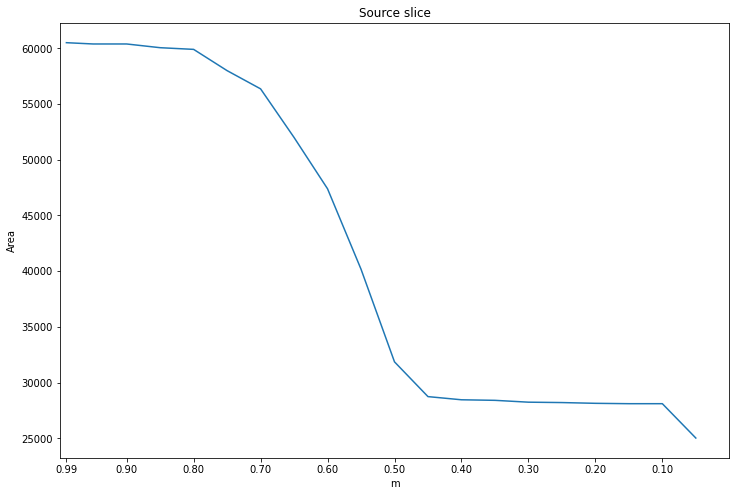

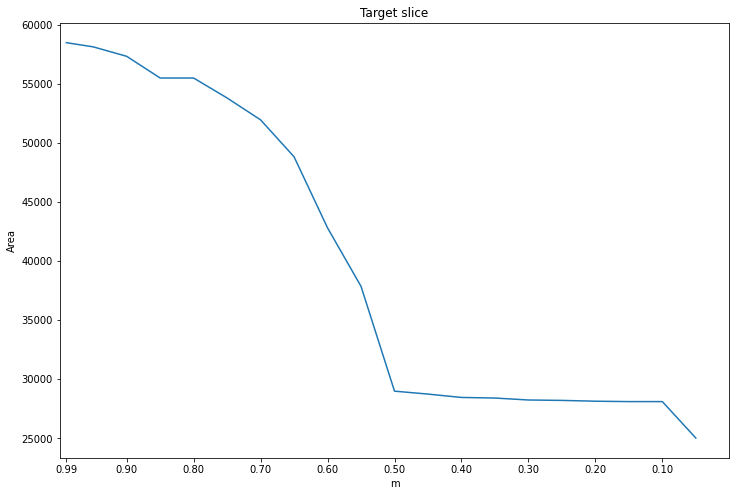

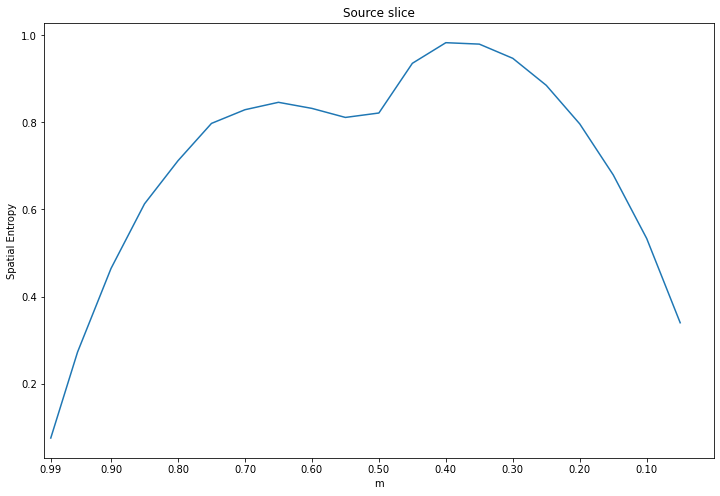

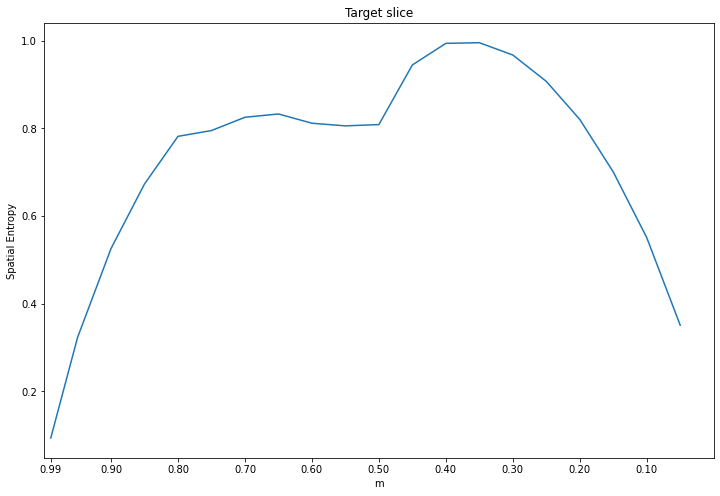

In [6]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)

In [ ]:
***
sim00-10
m=0.9
delta=0.1
***

In [7]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.9_dropFalse_rotateFalse_resampleTrue_delta0.1_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.9_dropFalse_rotateFalse_resampleTrue_delta0.1_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.9186E+7
Iteration: 1 | deviance=1.9183E+7
Iteration: 2 | deviance=1.7248E+7
Iteration: 3 | deviance=1.6763E+7
Iteration: 4 | deviance=1.6567E+7
Iteration: 5 | deviance=1.6457E+7
Iteration: 6 | deviance=1.6386E+7
Iteration: 7 | deviance=1.6338E+7
Iteration: 8 | deviance=1.6304E+7
Iteration: 9 | deviance=1.6279E+7
Iteration: 10 | deviance=1.6261E+7
Iteration: 11 | deviance=1.6246E+7
Iteration: 12 | deviance=1.6235E+7
Iteration: 13 | deviance=1.6225E+7
Iteration: 14 | deviance=1.6217E+7
Iteration: 15 | deviance=1.6210E+7
Iteration: 16 | deviance=1.6204E+7
Iteration: 17 | deviance=1.6199E+7
Iteration: 18 | deviance=1.6194E+7
Iteration: 19 | deviance=1.6190E+7
Iteration: 20 | deviance=1.6186E+7
Iteration: 21 | deviance=1.6183E+7
Iteration: 22 | deviance=1.6180E+7
Iteration: 23 | deviance=1.6178E+7
Iteration: 24 | deviance=1.6176E+7
Iteration: 25 | deviance=1.6174E+7
Iteration: 26 | deviance=1.6172E+7
Iteration: 27 | deviance=1.6170E+7
GLM-PCA fi

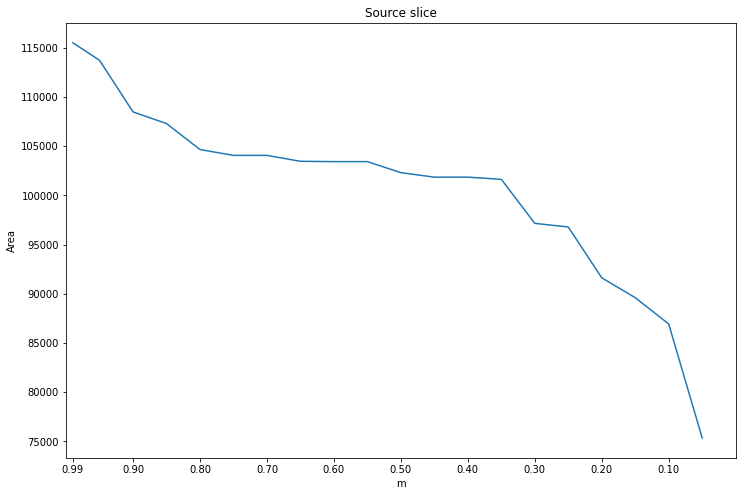

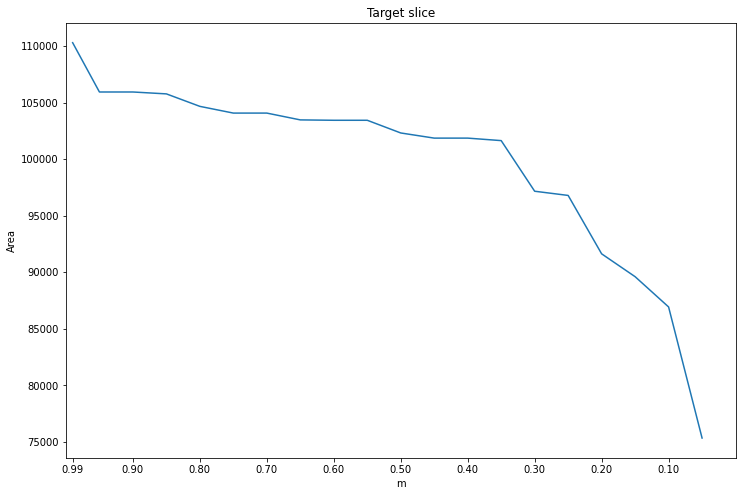

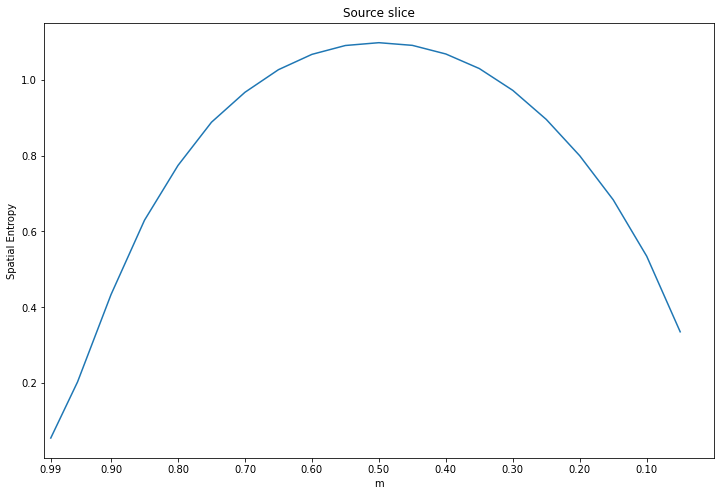

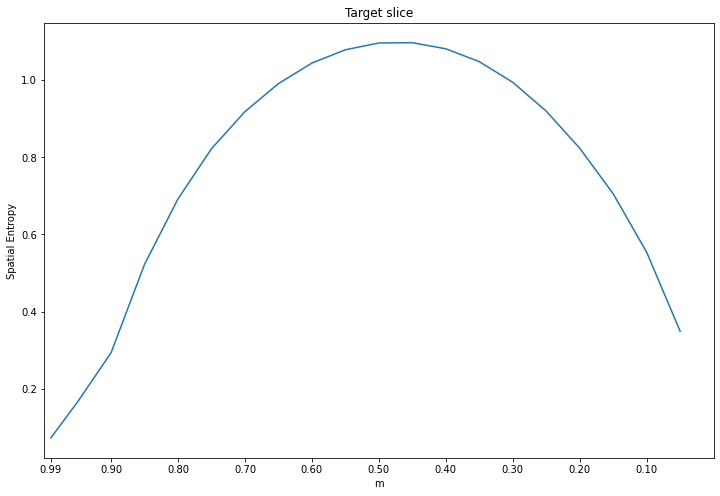

In [8]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)

In [ ]:
***
sim00-10
m=0.3
delta=1.0
***

In [9]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.3_dropFalse_rotateFalse_resampleTrue_delta1.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.3_dropFalse_rotateFalse_resampleTrue_delta1.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=6.1433E+6
Iteration: 1 | deviance=6.1432E+6
Iteration: 2 | deviance=5.6523E+6
Iteration: 3 | deviance=5.4790E+6
Iteration: 4 | deviance=5.3780E+6
Iteration: 5 | deviance=5.3192E+6
Iteration: 6 | deviance=5.2851E+6
Iteration: 7 | deviance=5.2636E+6
Iteration: 8 | deviance=5.2485E+6
Iteration: 9 | deviance=5.2374E+6
Iteration: 10 | deviance=5.2288E+6
Iteration: 11 | deviance=5.2221E+6
Iteration: 12 | deviance=5.2166E+6
Iteration: 13 | deviance=5.2120E+6
Iteration: 14 | deviance=5.2081E+6
Iteration: 15 | deviance=5.2049E+6
Iteration: 16 | deviance=5.2020E+6
Iteration: 17 | deviance=5.1996E+6
Iteration: 18 | deviance=5.1974E+6
Iteration: 19 | deviance=5.1955E+6
Iteration: 20 | deviance=5.1938E+6
Iteration: 21 | deviance=5.1923E+6
Iteration: 22 | deviance=5.1910E+6
Iteration: 23 | deviance=5.1898E+6
Iteration: 24 | deviance=5.1887E+6
Iteration: 25 | deviance=5.1877E+6
Iteration: 26 | deviance=5.1868E+6
Iteration: 27 | deviance=5.1860E+6
Iteration:

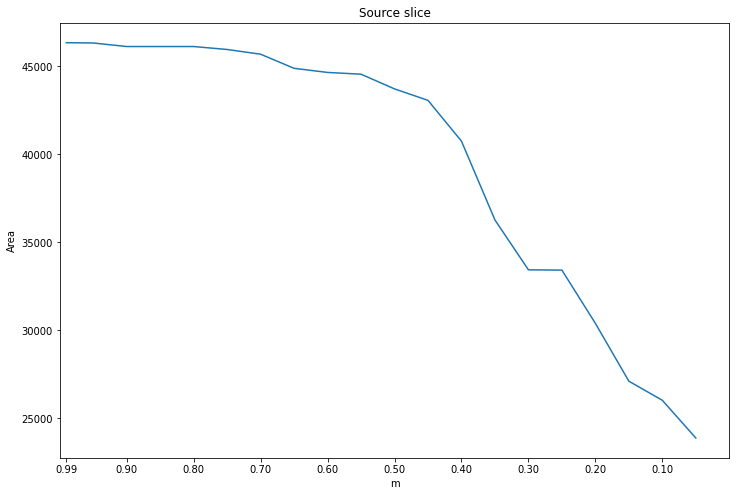

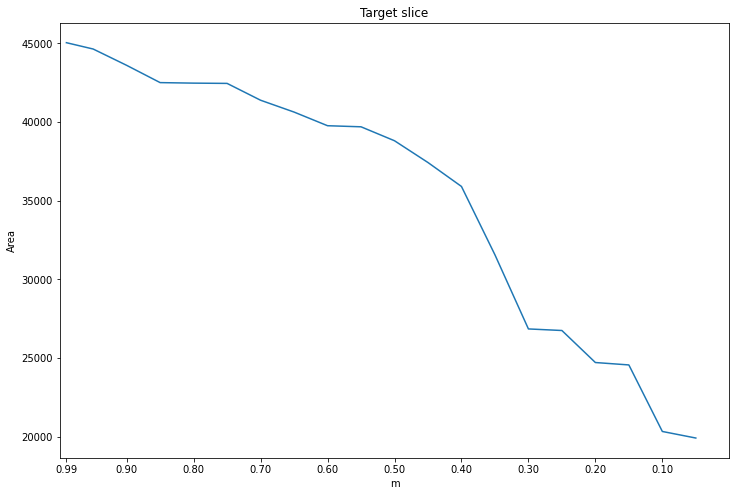

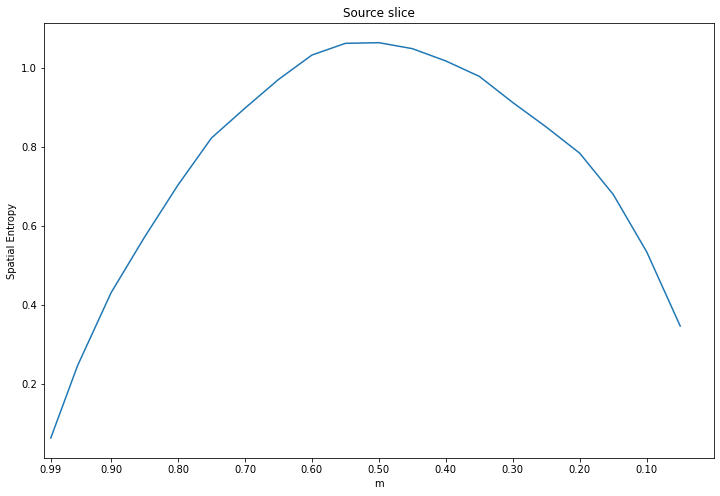

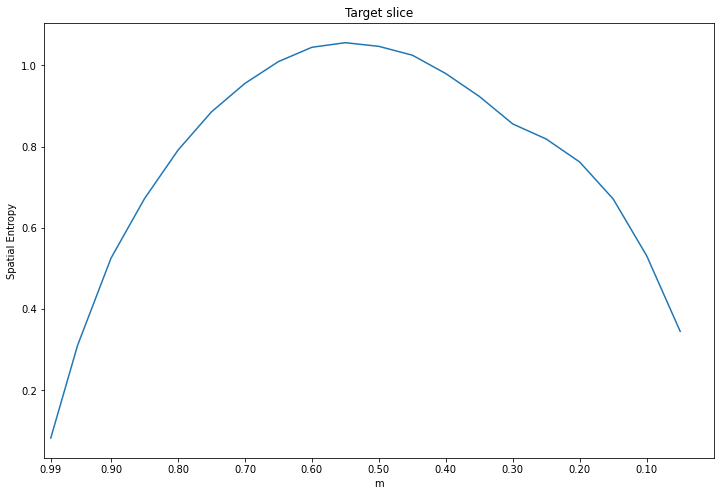

In [10]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)

In [ ]:
***
sim00-10
m=0.5
delta=1.0
***

In [11]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.5_dropFalse_rotateFalse_resampleTrue_delta1.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.5_dropFalse_rotateFalse_resampleTrue_delta1.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=8.1306E+6
Iteration: 1 | deviance=8.1304E+6
Iteration: 2 | deviance=7.4256E+6
Iteration: 3 | deviance=7.2075E+6
Iteration: 4 | deviance=7.0919E+6
Iteration: 5 | deviance=7.0322E+6
Iteration: 6 | deviance=6.9978E+6
Iteration: 7 | deviance=6.9758E+6
Iteration: 8 | deviance=6.9605E+6
Iteration: 9 | deviance=6.9492E+6
Iteration: 10 | deviance=6.9403E+6
Iteration: 11 | deviance=6.9332E+6
Iteration: 12 | deviance=6.9272E+6
Iteration: 13 | deviance=6.9223E+6
Iteration: 14 | deviance=6.9181E+6
Iteration: 15 | deviance=6.9145E+6
Iteration: 16 | deviance=6.9114E+6
Iteration: 17 | deviance=6.9087E+6
Iteration: 18 | deviance=6.9063E+6
Iteration: 19 | deviance=6.9043E+6
Iteration: 20 | deviance=6.9025E+6
Iteration: 21 | deviance=6.9009E+6
Iteration: 22 | deviance=6.8994E+6
Iteration: 23 | deviance=6.8981E+6
Iteration: 24 | deviance=6.8970E+6
Iteration: 25 | deviance=6.8959E+6
Iteration: 26 | deviance=6.8950E+6
Iteration: 27 | deviance=6.8941E+6
Iteration:

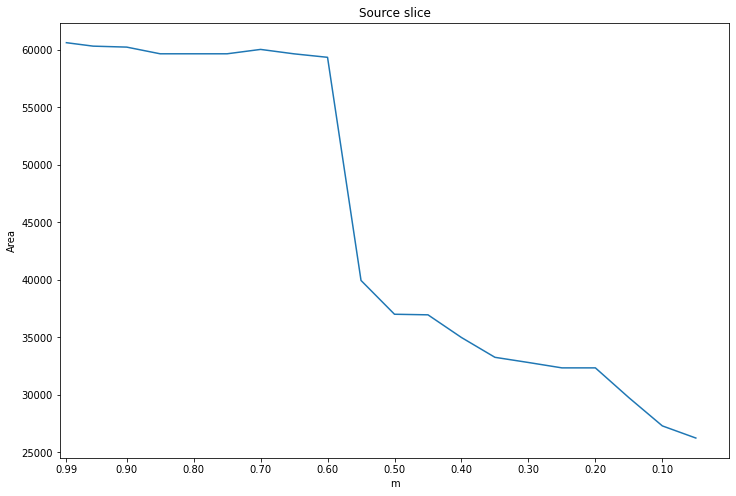

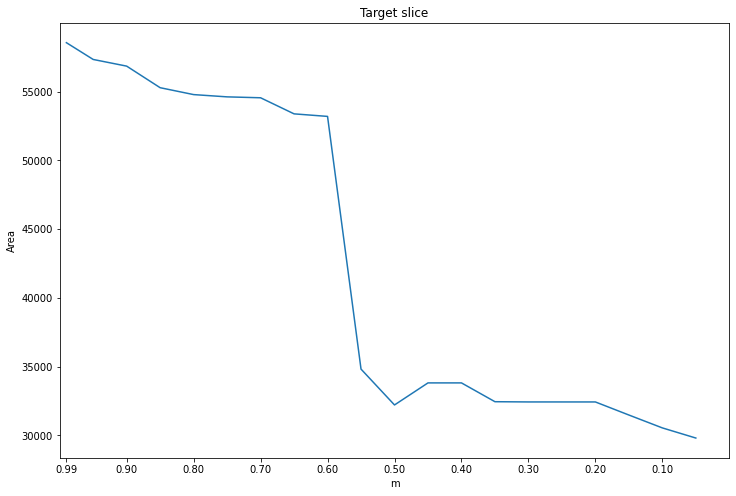

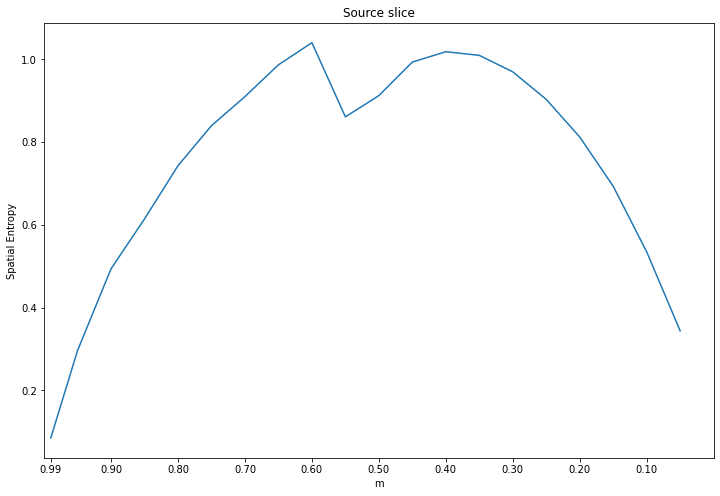

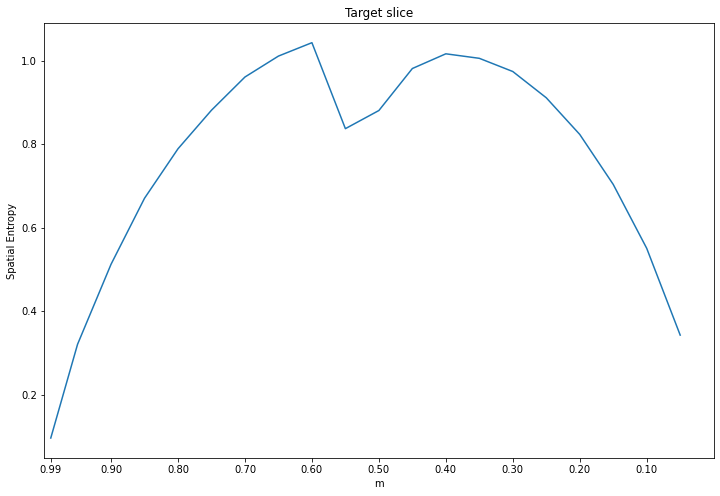

In [12]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)

In [ ]:
***
sim00-10
m=0.9
delta=1.0
***

In [5]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.9_dropFalse_rotateFalse_resampleTrue_delta1.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.9_dropFalse_rotateFalse_resampleTrue_delta1.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.6316E+7
Iteration: 1 | deviance=1.6314E+7
Iteration: 2 | deviance=1.4511E+7
Iteration: 3 | deviance=1.4124E+7
Iteration: 4 | deviance=1.3945E+7
Iteration: 5 | deviance=1.3852E+7
Iteration: 6 | deviance=1.3802E+7
Iteration: 7 | deviance=1.3773E+7
Iteration: 8 | deviance=1.3753E+7
Iteration: 9 | deviance=1.3738E+7
Iteration: 10 | deviance=1.3727E+7
Iteration: 11 | deviance=1.3718E+7
Iteration: 12 | deviance=1.3711E+7
Iteration: 13 | deviance=1.3705E+7
Iteration: 14 | deviance=1.3700E+7
Iteration: 15 | deviance=1.3695E+7
Iteration: 16 | deviance=1.3692E+7
Iteration: 17 | deviance=1.3688E+7
Iteration: 18 | deviance=1.3685E+7
Iteration: 19 | deviance=1.3683E+7
Iteration: 20 | deviance=1.3681E+7
Iteration: 21 | deviance=1.3679E+7
Iteration: 22 | deviance=1.3677E+7
Iteration: 23 | deviance=1.3675E+7
Iteration: 24 | deviance=1.3674E+7
GLM-PCA finished with joint matrix shape (6575, 50)


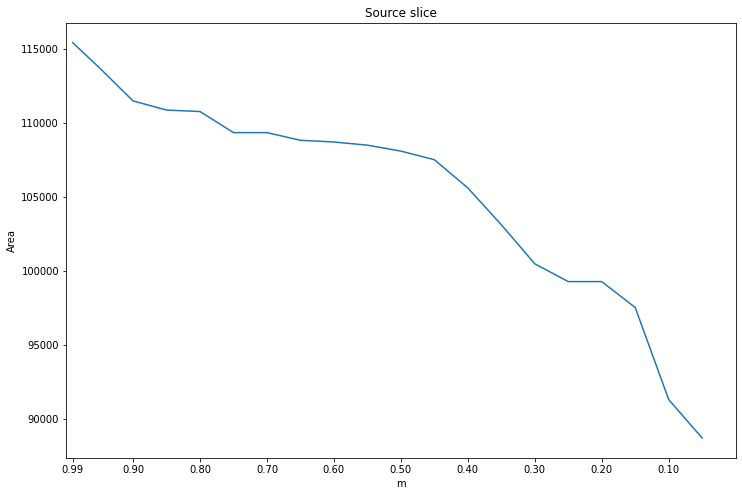

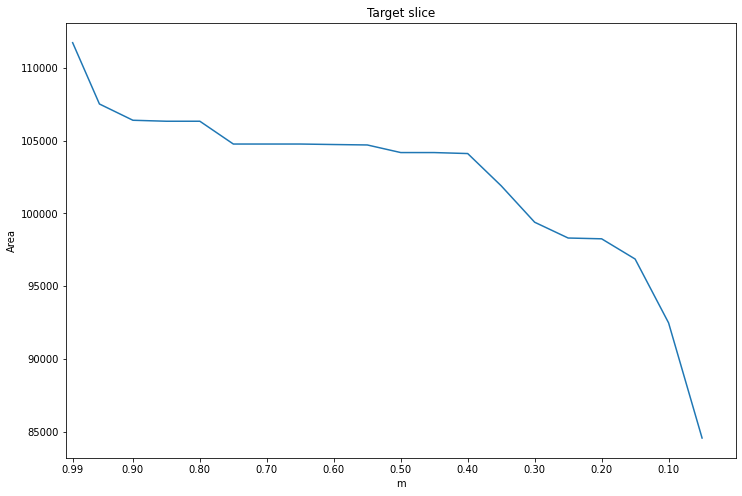

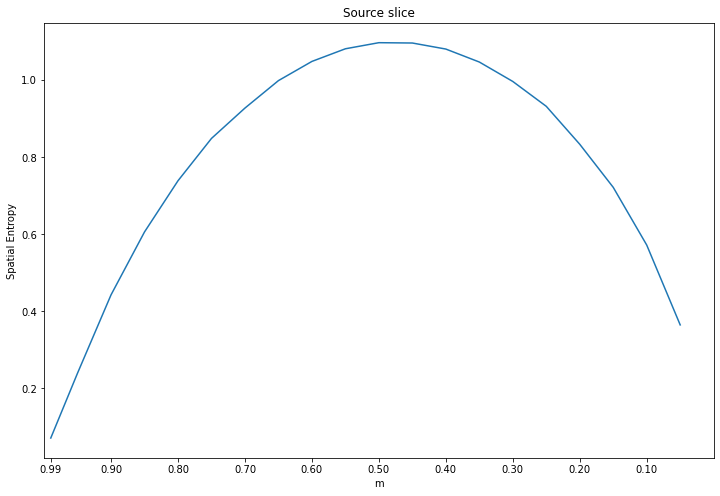

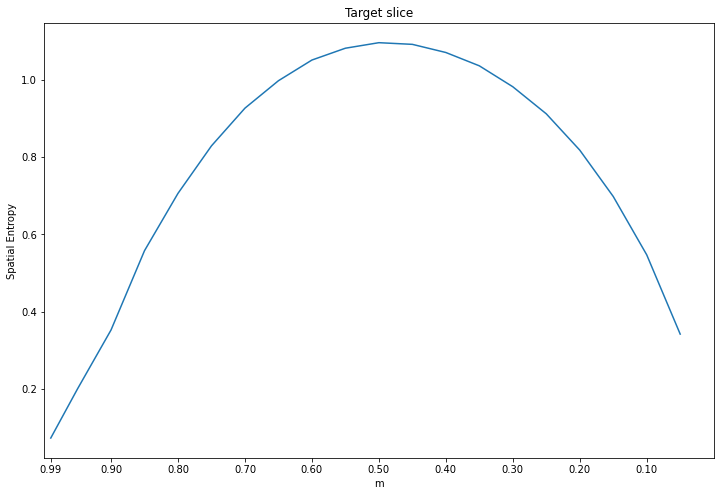

In [6]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)

In [ ]:
***
sim00-10
m=0.3
delta=3.0
***

In [7]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.3_dropFalse_rotateFalse_resampleTrue_delta3.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.3_dropFalse_rotateFalse_resampleTrue_delta3.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=6.0098E+6
Iteration: 1 | deviance=6.0096E+6
Iteration: 2 | deviance=5.3608E+6
Iteration: 3 | deviance=5.1857E+6
Iteration: 4 | deviance=5.0858E+6
Iteration: 5 | deviance=5.0390E+6
Iteration: 6 | deviance=5.0143E+6
Iteration: 7 | deviance=4.9993E+6
Iteration: 8 | deviance=4.9891E+6
Iteration: 9 | deviance=4.9816E+6
Iteration: 10 | deviance=4.9758E+6
Iteration: 11 | deviance=4.9711E+6
Iteration: 12 | deviance=4.9674E+6
Iteration: 13 | deviance=4.9643E+6
Iteration: 14 | deviance=4.9617E+6
Iteration: 15 | deviance=4.9594E+6
Iteration: 16 | deviance=4.9575E+6
Iteration: 17 | deviance=4.9558E+6
Iteration: 18 | deviance=4.9544E+6
Iteration: 19 | deviance=4.9531E+6
Iteration: 20 | deviance=4.9520E+6
Iteration: 21 | deviance=4.9509E+6
Iteration: 22 | deviance=4.9500E+6
Iteration: 23 | deviance=4.9492E+6
Iteration: 24 | deviance=4.9485E+6
Iteration: 25 | deviance=4.9478E+6
Iteration: 26 | deviance=4.9472E+6
Iteration: 27 | deviance=4.9466E+6
Iteration:

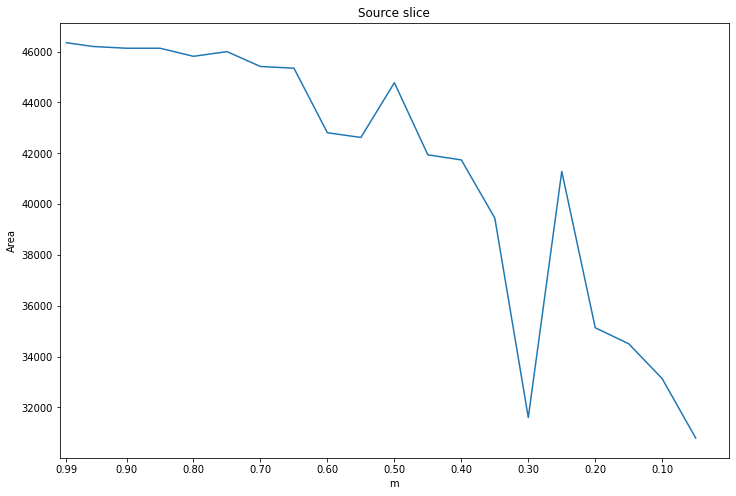

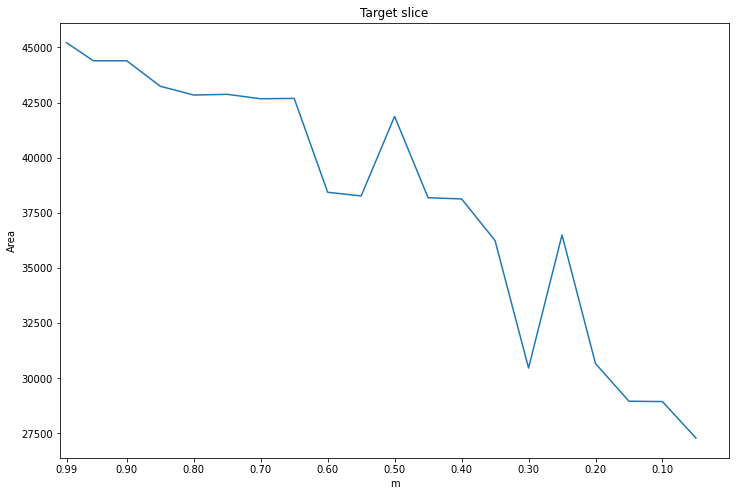

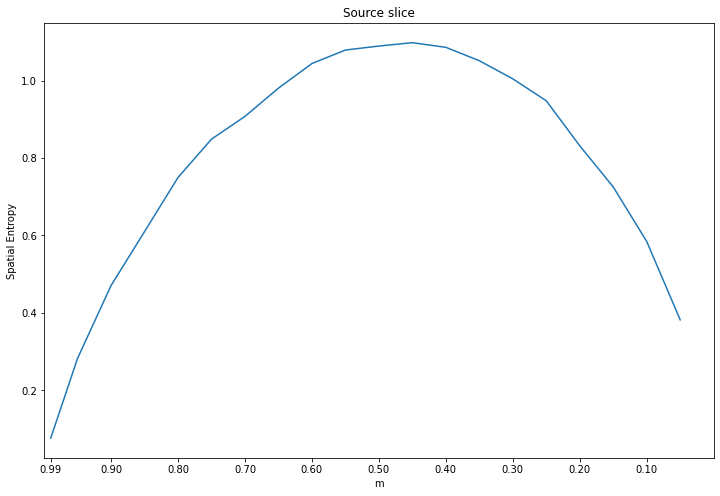

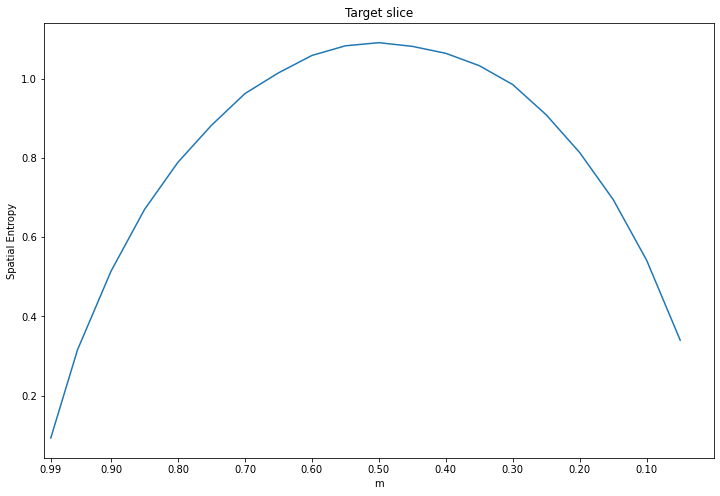

In [8]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)

In [ ]:
***
sim00-10
m=0.5
delta=3.0
***

In [3]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.5_dropFalse_rotateFalse_resampleTrue_delta3.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.5_dropFalse_rotateFalse_resampleTrue_delta3.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=7.9995E+6
Iteration: 1 | deviance=7.9991E+6
Iteration: 2 | deviance=7.0557E+6
Iteration: 3 | deviance=6.8779E+6
Iteration: 4 | deviance=6.7749E+6
Iteration: 5 | deviance=6.7189E+6
Iteration: 6 | deviance=6.6868E+6
Iteration: 7 | deviance=6.6668E+6
Iteration: 8 | deviance=6.6529E+6
Iteration: 9 | deviance=6.6427E+6
Iteration: 10 | deviance=6.6348E+6
Iteration: 11 | deviance=6.6284E+6
Iteration: 12 | deviance=6.6232E+6
Iteration: 13 | deviance=6.6188E+6
Iteration: 14 | deviance=6.6150E+6
Iteration: 15 | deviance=6.6118E+6
Iteration: 16 | deviance=6.6089E+6
Iteration: 17 | deviance=6.6064E+6
Iteration: 18 | deviance=6.6042E+6
Iteration: 19 | deviance=6.6022E+6
Iteration: 20 | deviance=6.6005E+6
Iteration: 21 | deviance=6.5989E+6
Iteration: 22 | deviance=6.5975E+6
Iteration: 23 | deviance=6.5962E+6
Iteration: 24 | deviance=6.5950E+6
Iteration: 25 | deviance=6.5940E+6
Iteration: 26 | deviance=6.5930E+6
Iteration: 27 | deviance=6.5921E+6
Iteration:

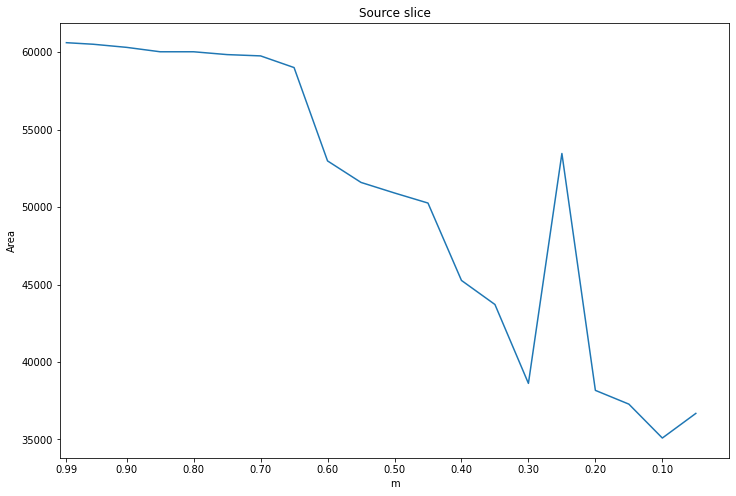

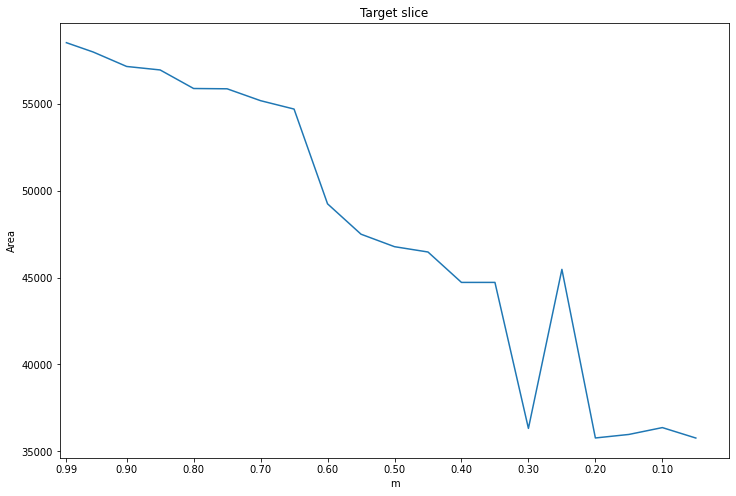

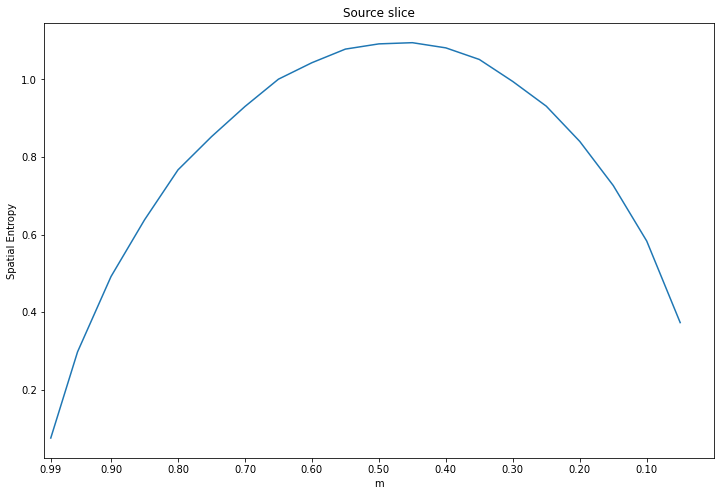

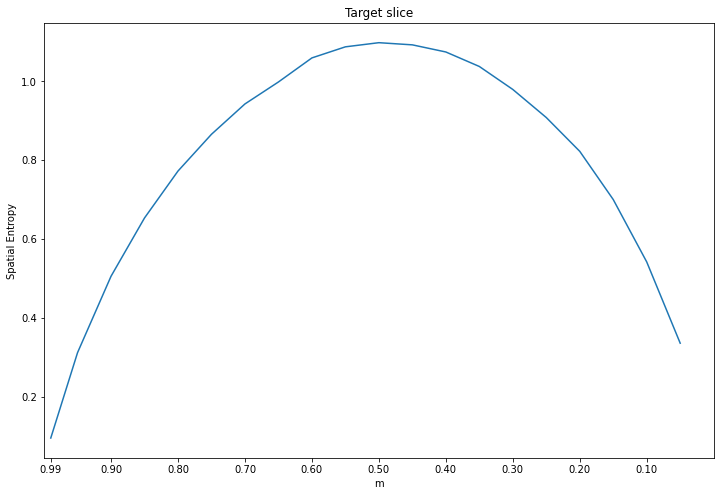

In [4]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)

In [ ]:
***
sim00-10
m=0.7
delta=3.0
***

In [9]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.7_dropFalse_rotateFalse_resampleTrue_delta3.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.7_dropFalse_rotateFalse_resampleTrue_delta3.0_row1_col0.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
common_genes = intersect(sliceA.var.index, sliceB.var.index)
sliceA = sliceA[:, common_genes]
sliceB = sliceB[:, common_genes]
# Get transport cost matrix
A_X, B_X = to_dense_array(extract_data_matrix(sliceA, None)), to_dense_array(extract_data_matrix(sliceB, None))
M = glmpca_distance(A_X, B_X, latent_dim=50, filter=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.1224E+7
Iteration: 1 | deviance=1.1222E+7
Iteration: 2 | deviance=9.7845E+6
Iteration: 3 | deviance=9.5387E+6
Iteration: 4 | deviance=9.3984E+6
Iteration: 5 | deviance=9.3179E+6
Iteration: 6 | deviance=9.2696E+6
Iteration: 7 | deviance=9.2384E+6
Iteration: 8 | deviance=9.2175E+6
Iteration: 9 | deviance=9.2030E+6
Iteration: 10 | deviance=9.1923E+6
Iteration: 11 | deviance=9.1841E+6
Iteration: 12 | deviance=9.1776E+6
Iteration: 13 | deviance=9.1723E+6
Iteration: 14 | deviance=9.1680E+6
Iteration: 15 | deviance=9.1643E+6
Iteration: 16 | deviance=9.1612E+6
Iteration: 17 | deviance=9.1585E+6
Iteration: 18 | deviance=9.1562E+6
Iteration: 19 | deviance=9.1541E+6
Iteration: 20 | deviance=9.1523E+6
Iteration: 21 | deviance=9.1507E+6
Iteration: 22 | deviance=9.1493E+6
Iteration: 23 | deviance=9.1480E+6
Iteration: 24 | deviance=9.1469E+6
Iteration: 25 | deviance=9.1458E+6
Iteration: 26 | deviance=9.1449E+6
GLM-PCA finished with joint matrix shape (467

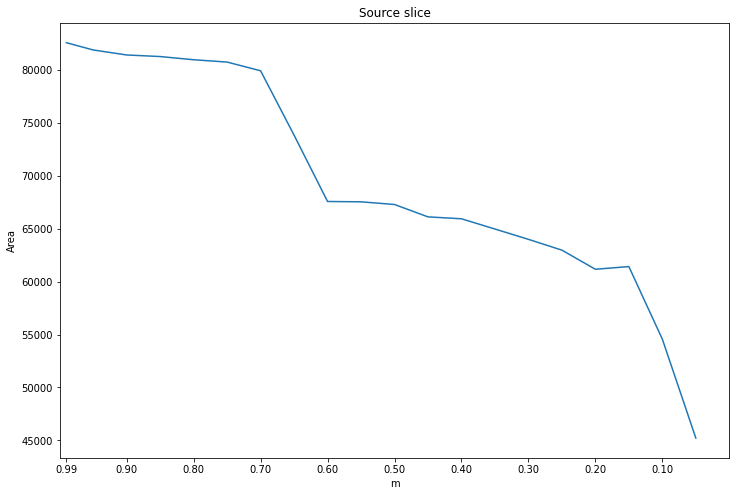

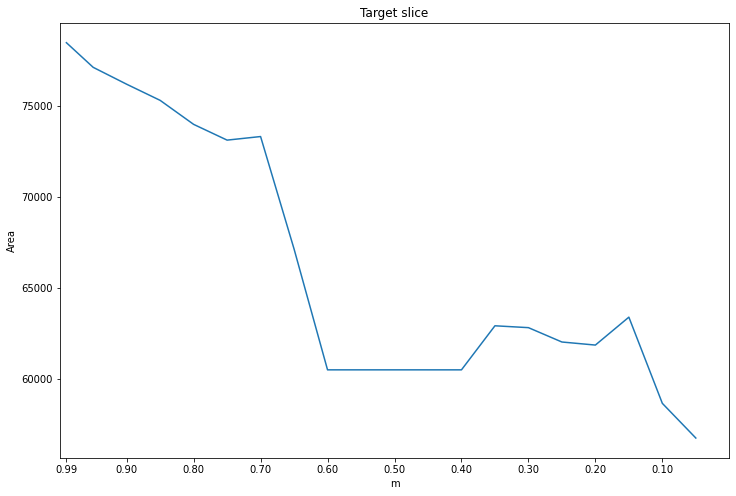

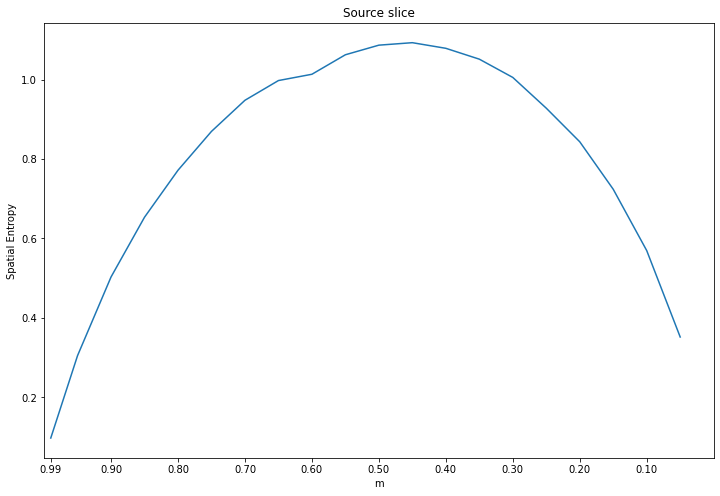

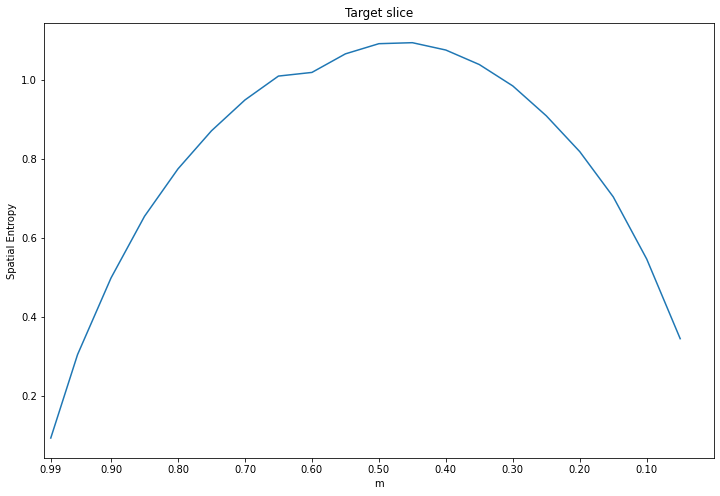

In [10]:
sliceA_areas = []
sliceB_areas = []
sliceA_entropies = []
sliceB_entropies = []
m_to_run = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

for m in m_to_run:
    pi, log = partial_pairwise_align_given_cost_matrix(sliceA, sliceB, M=M, alpha=0.1, m=m, armijo=False,
                                                       norm=True, return_obj=True, verbose=False)
    sliceA_area, sliceB_area = convex_hull_area(sliceA, sliceB, pi)
    sliceA_entropy, sliceB_entropy = calculate_spatial_coherence_for_alignment(sliceA, sliceB, pi)
    
    sliceA_areas.append(sliceA_area)
    sliceB_areas.append(sliceB_area)
    sliceA_entropies.append(sliceA_entropy)
    sliceB_entropies.append(sliceB_entropy)

plot_area_curve(m_to_run, sliceA_areas, sliceB_areas)
plot_entropy_curve(m_to_run, sliceA_entropies, sliceB_entropies)